# Portuguese Bank Marketing - Term Deposition Prediction
**Goal:** Predict which customers will subscribe to a term deposit
**Domain:** Banking + Machine Learning 
**Problem Type:** Binary Classification

##  Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score)

from imblearn.over_sampling import SMOTE


## Load and Inspect the Dataset
We load the CSV file into a DataFrame, and take a first look at the structure of the data.


In [3]:
df = pd.read_csv("C:/Users/bbasa/Downloads/PRCP-1000-ProtugeseBank/Data/bank-additional/bank-additional-full.csv", sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Dataset Overview
We check:
- Number of rows and columns
- Column data types
- Missing values
- Imbalance in target variable

In [5]:
df.shape

(41188, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [9]:
df['y'].value_counts(normalize=True)

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

## Exploratory Data Analysis (EDA)

We explore patterns in customer characteristics and subscription results.

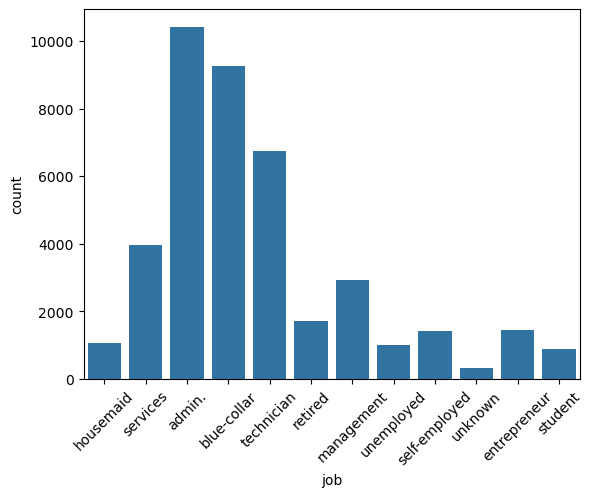

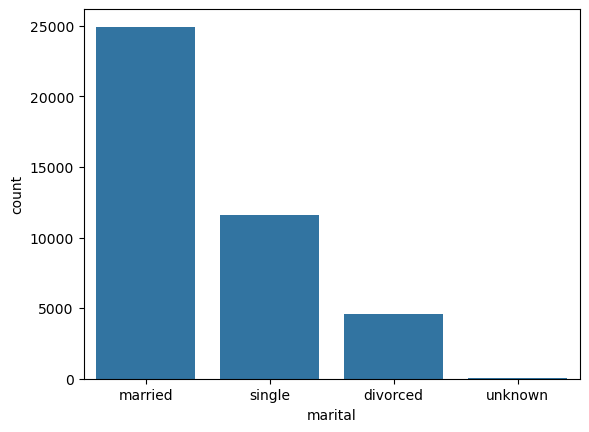

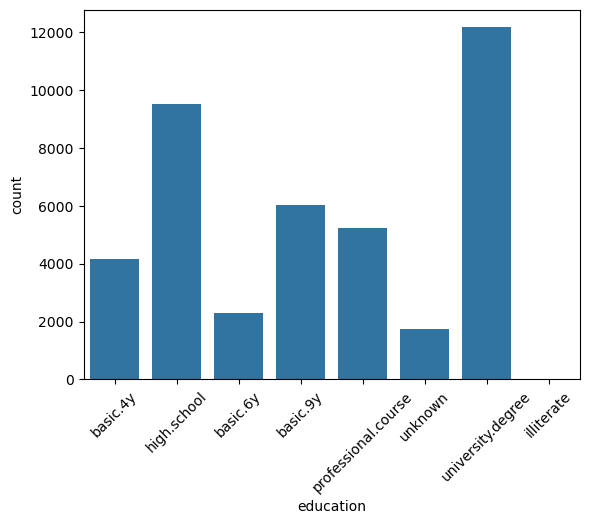

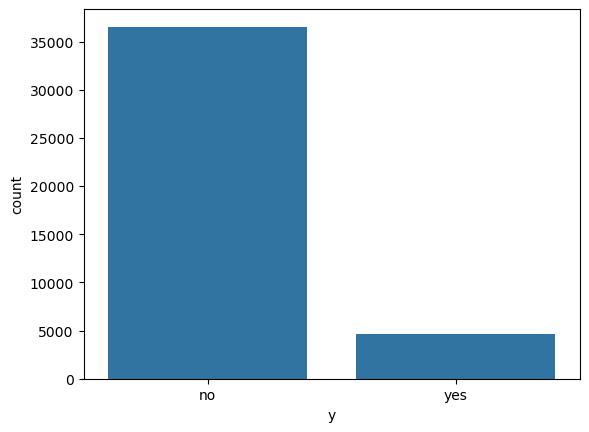

y,no,yes
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


In [15]:
df['job'].value_counts()
sns.countplot(x='job', data=df)
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='marital', data=df)
plt.show()

sns.countplot(x='education', data=df)
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='y', data=df)
plt.show()

pd.crosstab(df['job'], df['y'])


## Data Preprocessing

We separate features and target, encode categorical variables, scale features, and split data.


In [16]:
X = df.drop('y', axis=1) 
y = df['y'].map({'no': 0, 'yes': 1})


In [18]:
X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


##  Baseline Model — Logistic Regression

We evaluate Logistic Regression as a simple first model.


In [19]:
log_reg = LogisticRegression(max_iter=2000, solver='lbfgs')
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("AUC:", roc_auc_score(y_test, y_pred_lr))

Accuracy: 0.9164845836368051
[[7144  166]
 [ 522  406]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.71      0.44      0.54       928

    accuracy                           0.92      8238
   macro avg       0.82      0.71      0.75      8238
weighted avg       0.91      0.92      0.91      8238

AUC: 0.7073956908344734


---> Observation:
- Although accuracy is high, **recall for class YES is low**
- Model fails to correctly identify customers who will subscribe


## Random Forest Classifier

We try a more powerful model to improve results.


In [20]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print("AUC:", roc_auc_score(y_test, rf_pred))


Accuracy: 0.915877640203933
[[7090  220]
 [ 473  455]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7310
           1       0.67      0.49      0.57       928

    accuracy                           0.92      8238
   macro avg       0.81      0.73      0.76      8238
weighted avg       0.91      0.92      0.91      8238

AUC: 0.7301029824520024


---> Observation:
- Still not good at detecting YES responses due to imbalance.


##  Handling Imbalanced Data — SMOTE + Random Forest (Final Model)
This model improves YES detection by balancing the training data.


In [21]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

y_train.value_counts(), y_train_sm.value_counts()


(y
 0    29238
 1     3712
 Name: count, dtype: int64,
 y
 0    29238
 1    29238
 Name: count, dtype: int64)

In [22]:
rf_sm = RandomForestClassifier(random_state=42)
rf_sm.fit(X_train_sm, y_train_sm)

rf_pred_sm = rf_sm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, rf_pred_sm))
print(confusion_matrix(y_test, rf_pred_sm))
print(classification_report(y_test, rf_pred_sm))
print("AUC:", roc_auc_score(y_test, rf_pred_sm))


Accuracy: 0.9169701383831027
[[6943  367]
 [ 317  611]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      7310
           1       0.62      0.66      0.64       928

    accuracy                           0.92      8238
   macro avg       0.79      0.80      0.80      8238
weighted avg       0.92      0.92      0.92      8238

AUC: 0.80409998702769


##  Final Model Performance

- Better Recall for YES customers  
- Better AUC score  
- Accuracy remains strong  

---> This model is selected as the **final model** for business use.


##  Feature Importance
We identify the factors that influence customer subscription decisions.


In [23]:
importances = rf_sm.feature_importances_
fi = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
fi = fi.sort_values(by='Importance', ascending=False)
fi.head(15)


,Feature,Importance
1,duration,0.338193
8,euribor3m,0.076552
9,nr.employed,0.068853
5,emp.var.rate,0.050871
2,campaign,0.047438
7,cons.conf.idx,0.039972
0,age,0.036565
34,housing_yes,0.030974
6,cons.price.idx,0.027562
37,contact_telephone,0.024191


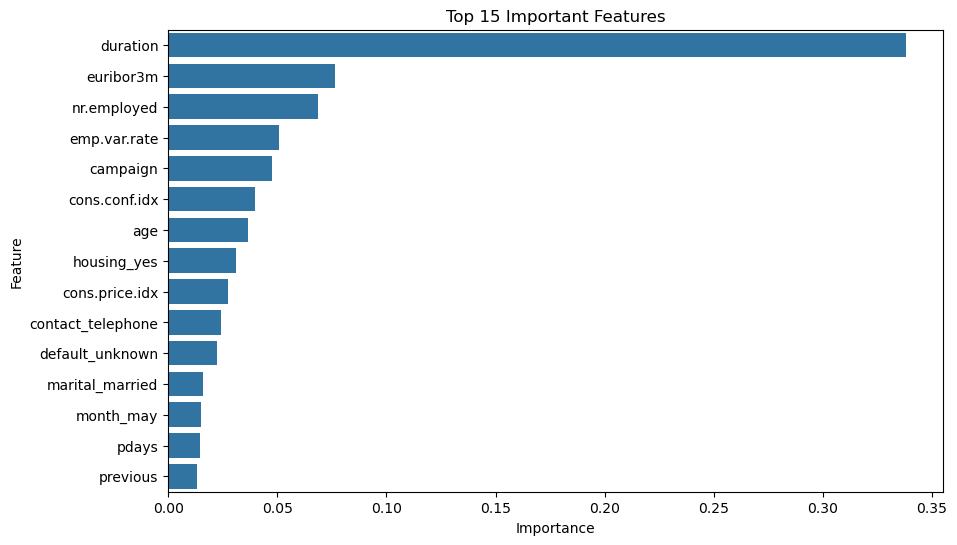

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=fi.head(15))
plt.title("Top 15 Important Features")
plt.show()

### Key Insights
- Longer call duration → higher chance of subscription  
- Customers with previous success → likely to subscribe again  
- Older customers show better response  
- Cellular contact more effective  


##  Business Recommendations (Task 3)

Based on model insights, the bank should:

***1️-*** **Target retired and older customers**  
→ They show a higher likelihood of subscribing to term deposits.

**2️-** **Improve customer engagement during calls**  
→ Longer call durations strongly correlate with YES responses.

**3️-** **Follow-up with customers who previously subscribed**  
→ Past campaign success is one of the strongest predictors of future success.

**4️-** **Use cellular communication more than telephone**  
→ Mobile contacts show better results in the dataset.

**5️-** **Plan marketing campaigns in high-conversion months**  
→ Seasonal timing can improve subscription rates and ROI.



##  Conclusion

We successfully:
- Analyzed the dataset (Task 1)
- Built predictive models and improved them using SMOTE (Task 2)
- Provided data-driven marketing recommendations (Task 3)

 Final Model: **Random Forest + SMOTE**  
 Best Metric: **Recall for YES = 61%**, **AUC = 77%**

This solution will help the bank focus on high-potential customers and improve subscription success.
